In [1]:
!pwd

/teamspace/studios/this_studio


In [2]:
import os
import sys

os.chdir('object_detection')
ROOT = os.getcwd()
ROOT

'/teamspace/studios/this_studio/object_detection'

In [ ]:
!git clone https://github.com/sadhiin/cocoapi.git

In [13]:
os.chdir('raw_data')
!pwd

/teamspace/studios/this_studio/object_detection/raw_data


In [14]:
ROOT = os.getcwd()
ROOT

'/teamspace/studios/this_studio/object_detection/raw_data'

# COCO DataSet

First we will use the COCO PythonAPI `pycocotools` to load the COCO dataset and learn how to read its annotations. To install `pycocotools`, run:

```bash
!pip install pycocotools>=2.0.1
```


COCO PythonAPI's Tutorial: [pycocoDemo.ipynb](https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb)

In [33]:
import cocoapi.PythonAPI.pycocotools as tool
import tqdm
import urllib.request
import os, cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [11]:
# Download and unzip annotations
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

!unzip annotations_trainval2017.zip
!rm annotations_trainval2017.zip

!mkdir COCOdataset2017
!mv annotations COCOdataset2017/

--2024-03-07 07:48:22--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.27.130, 52.217.235.145, 52.217.205.185, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.27.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  96.2MB/s    in 2.5s    

2024-03-07 07:48:24 (96.2 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]

Archive:  annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [10]:
!pip install pycocotools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.2/426.2 kB 34.6 MB/s eta 0:00:00


In [11]:
from pycocotools.coco import COCO

In [15]:
coco = COCO('COCOdataset2017/annotations/instances_train2017.json')

loading annotations into memory...


Done (t=16.36s)
creating index...
index created!


In [54]:
# get all categories

cats = coco.loadCats(coco.getCatIds())

# print categories

nams = [cat['name'] for cat in cats]

print(f"Toatla categories: {len(nams)}")
print(f"Categories name -->: {' '.join(nams)}")

Toatla categories: 80
Categories name -->: person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush


### Downloading only [`airplane` `bus` `train` `truck` `boat`] cateigoies

In [49]:
# --------------------- downloading the specified categories class------------------

# catIds = coco.getCatIds(catNms=['car', 'bicycle', 'motorcycle', 'bus', 'train'])
catIds = coco.getCatIds(catNms=['tv', 'laptop', 'mouse', 'remote', 'keyboard' ,'cell phone'])

# Get images ids
imgIds = coco.getImgIds(catIds=catIds)
print("ImageIDS: ", len(imgIds))
# Load images
images = coco.loadImgs(imgIds)

print(len(imgIds))
print("imgIds: ", imgIds[0])
print("images: ", images[0])

ImageIDS:  26
26
imgIds:  110593
images:  {'license': 4, 'file_name': '000000110593.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000110593.jpg', 'height': 334, 'width': 500, 'date_captured': '2013-11-22 01:09:40', 'flickr_url': 'http://farm3.staticflickr.com/2076/2052781232_2679e55264_z.jpg', 'id': 110593}


In [29]:
!pwd

/teamspace/studios/this_studio/object_detection/raw_data


In [50]:
im_folder = 'COCOdataset2017/images/train/'

# Download images
for im in tqdm.notebook.tqdm(images):
    im_path = im_folder + im['file_name']
    if not os.path.exists(im_path):
        urllib.request.urlretrieve(im['coco_url'], im_path)

  0%|          | 0/26 [00:00<?, ?it/s]

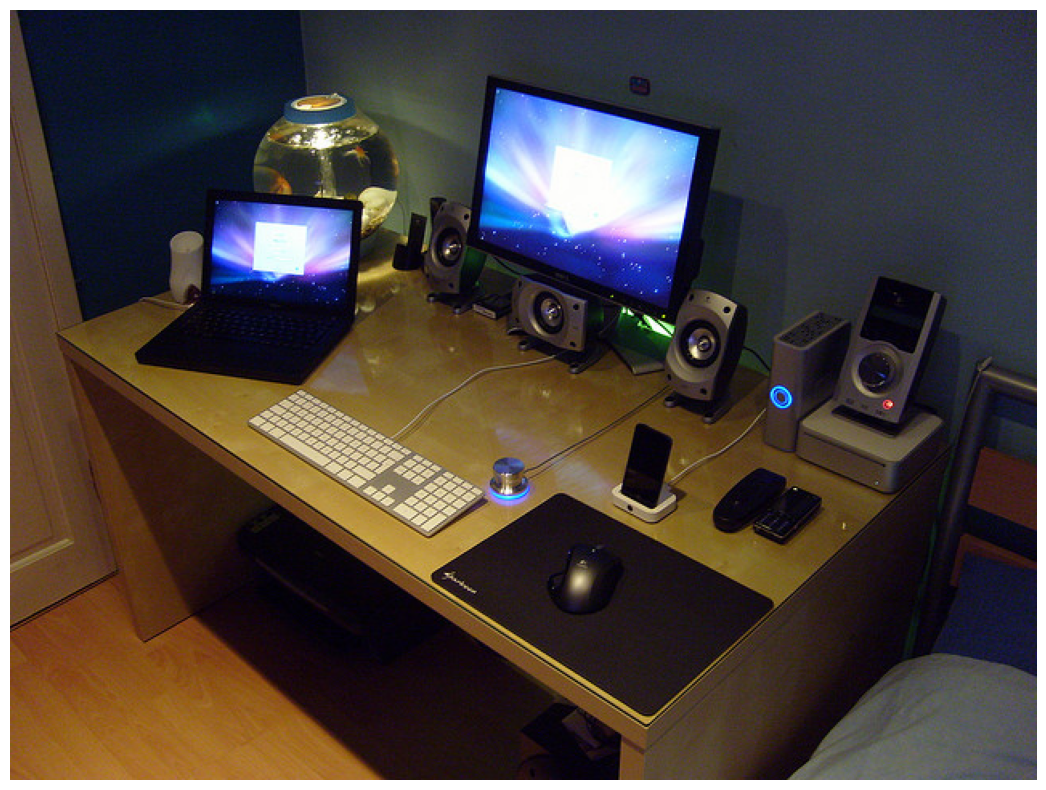

In [51]:
# Display a random image
img = images[np.random.randint(0, len(imgIds))]
im = cv2.imread(im_folder + img['file_name'])
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im)
plt.axis('off')
plt.show()

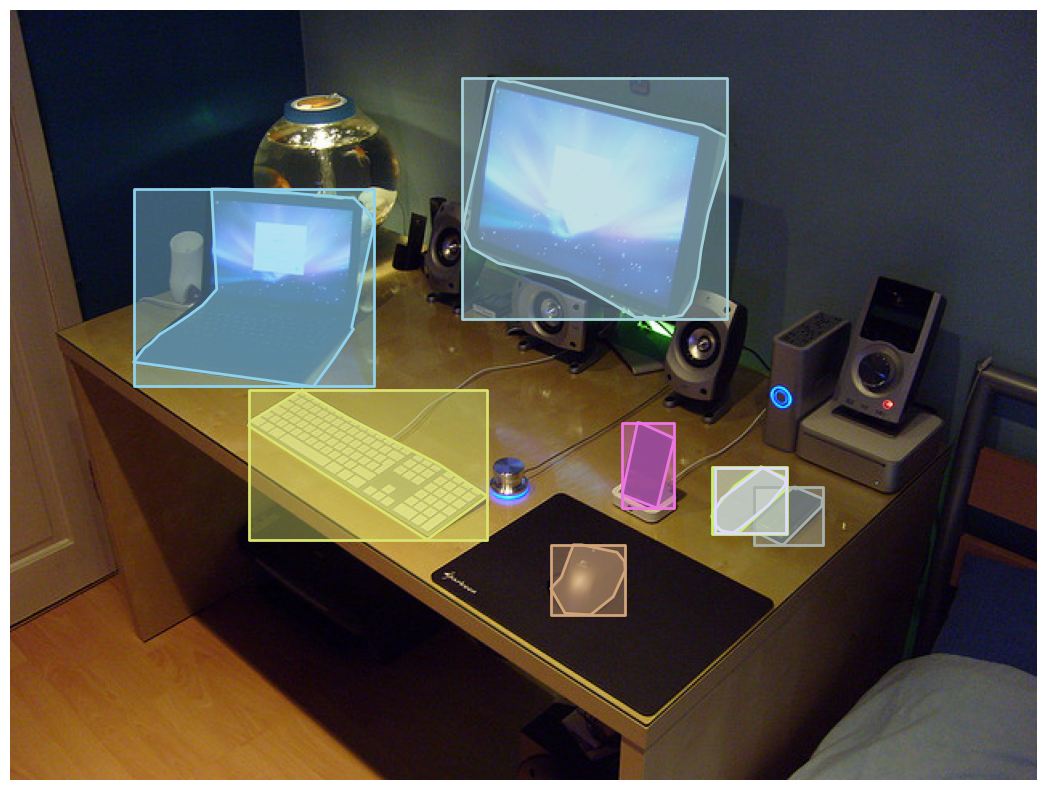

In [52]:
plt.imshow(im); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns, draw_bbox=True)

In [56]:
[{nams[annot['category_id'] - 1]: annot['bbox']} for annot in anns]

[{'sink': [281.53, 42.07, 165.03, 149.93]},
 {'scissors': [381.1, 256.69, 32.54, 53.32]},
 {'scissors': [463.18, 296.76, 42.86, 35.94]},
 {'refrigerator': [76.58, 111.1, 149.94, 122.97]},
 {'book': [336.59, 332.88, 46.48, 43.66]},
 {'clock': [436.9, 284.18, 46.92, 42.07]},
 {'vase': [148.24, 236.23, 148.8, 93.43]},
 {'scissors': [438.94, 284.83, 43.99, 40.57]}]